In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
#Read the Data
df = pd.read_csv('E:\Project\Input\Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
df['Score']

0      5
1      1
2      4
3      2
4      5
      ..
495    5
496    5
497    4
498    4
499    5
Name: Score, Length: 500, dtype: int64

In [6]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

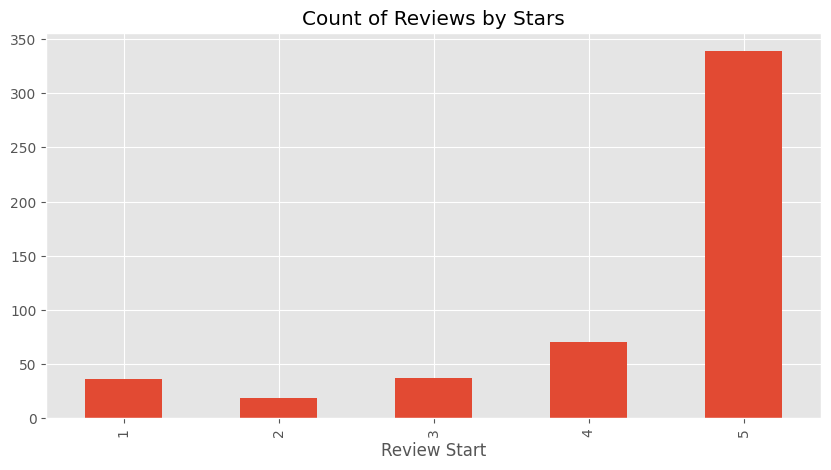

In [7]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars', 
          figsize=(10,5))

ax.set_xlabel('Review Start')
plt.show()

NLTK

In [8]:
example = df['Text'][47]
print(example)
import nltk.tokenize
from nltk.tokenize import word_tokenize, sent_tokenize

The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.


In [50]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
nltk.word_tokenize(example)

['The',
 'flavors',
 'are',
 'good',
 '.',
 'However',
 ',',
 'I',
 'do',
 'not',
 'see',
 'any',
 'differce',
 'between',
 'this',
 'and',
 'Oaker',
 'Oats',
 'brand',
 '-',
 'they',
 'are',
 'both',
 'mushy',
 '.']

In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The', 'flavors', 'are', 'good', '.', 'However', ',', 'I', 'do', 'not']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('flavors', 'NNS'),
 ('are', 'VBP'),
 ('good', 'JJ'),
 ('.', '.'),
 ('However', 'RB'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ('not', 'RB')]

Link : "https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html"

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  The/DT
  flavors/NNS
  are/VBP
  good/JJ
  ./.
  However/RB
  ,/,
  I/PRP
  do/VBP
  not/RB
  see/VB
  any/DT
  differce/NN
  between/IN
  this/DT
  and/CC
  (PERSON Oaker/NNP Oats/NNP)
  brand/NN
  -/:
  they/PRP
  are/VBP
  both/DT
  mushy/NNS
  ./.)


Vader Sentiment

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('This is so good')

{'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.5777}

In [15]:
sia.polarity_scores('This might be the worst thing ever')

{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.6249}

In [16]:
#Running the polarity score on the dataset

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [18]:
#Sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot VADERS

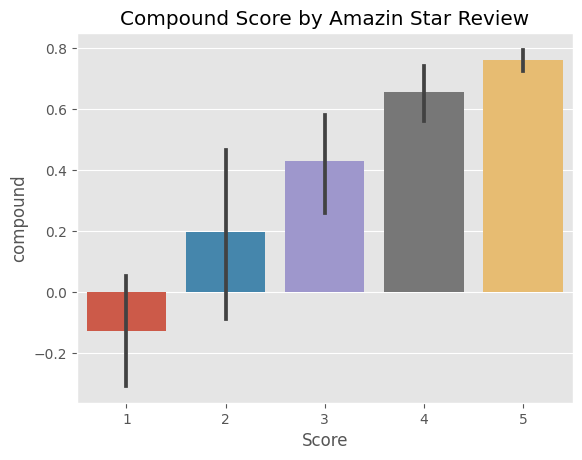

In [19]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazin Star Review')
plt.show()